In [1]:
import matplotlib.pyplot as plt
from qiskit import Aer, QuantumCircuit, execute, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [3]:
# Init Qasm simulator backend
qasm = Aer.get_backend('qasm_simulator')
backend_sim = qasm  # Choose your backend : <quantum_computer> or <qasm>

In [38]:
typ_dice = 6
nb_qubits = len(bin(typ_dice - 1)[2:])  # Optimisation du nombre de qubit pour minimiser la décohérence
tab = []
ite = 1000

#########################################################
#########################################################
# #Circuit

# Quantum Circuit
circ = QuantumCircuit(nb_qubits)
for i in range(0, nb_qubits):
    circ.h(i)

# Measurement Circuit
meas = QuantumCircuit(nb_qubits, nb_qubits)
# map the quantum measurement to the classical bits
meas.measure(range(nb_qubits), range(nb_qubits))

qc = circ+meas  # merge circuits

#########################################################
#########################################################
# #Run

for v in range(ite):
    job = execute(qc, backend_sim, shots=100, memory=True)

    # Result job
    result_sim = job.result()
    counts = result_sim.get_counts(qc)
    memory = result_sim.get_memory()

    total = 0
    for i in memory:
        result = int(i, 2)

        # Convertion du nombre en tirage du dé 4, 6, 8, 10, 12 ou 20
        value_dice = round((result + 1) / 2**nb_qubits * typ_dice)
        if value_dice == 0:
            value_dice += 1

        total += value_dice

    #print("Total : ", total)

    tab.append(total)

print("Tab : ", tab)
    

Tab :  [371, 352, 339, 345, 351, 355, 350, 327, 364, 320, 373, 323, 355, 305, 339, 359, 331, 339, 352, 356, 352, 348, 352, 312, 367, 325, 357, 321, 316, 328, 345, 344, 346, 321, 339, 315, 337, 353, 333, 323, 365, 338, 318, 329, 346, 330, 354, 352, 311, 323, 334, 343, 331, 337, 330, 346, 379, 346, 365, 354, 326, 339, 351, 349, 321, 347, 331, 376, 333, 312, 348, 323, 343, 358, 364, 336, 320, 335, 349, 338, 351, 352, 333, 369, 323, 315, 314, 326, 362, 307, 341, 316, 347, 347, 339, 327, 353, 348, 347, 331, 332, 345, 326, 328, 374, 349, 317, 335, 333, 334, 326, 301, 346, 343, 343, 340, 331, 340, 348, 350, 365, 332, 342, 357, 331, 351, 357, 321, 366, 331, 340, 368, 335, 316, 334, 336, 349, 329, 330, 326, 318, 339, 351, 322, 330, 328, 335, 353, 328, 356, 362, 313, 347, 349, 303, 319, 344, 330, 336, 343, 337, 357, 289, 332, 332, 311, 338, 335, 331, 348, 358, 317, 347, 344, 359, 341, 331, 339, 357, 357, 342, 346, 345, 323, 340, 348, 348, 332, 336, 340, 326, 337, 327, 333, 360, 379, 328, 328, 31

In [39]:
compare_tab = [[], []]

for i in tab:
    if i % 2 == 0:
        compare_tab[0].append(i)
    else:
        compare_tab[1].append(i)

Diff : 50.4%


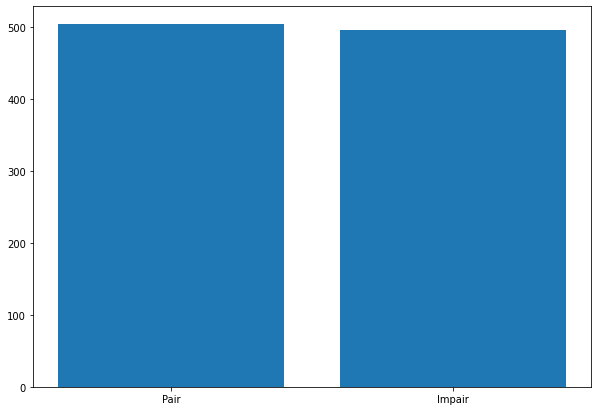

In [40]:
fig = plt.figure(figsize =(10, 7))
typo = ['Pair', 'Impair']
number = [len(compare_tab[0]), len(compare_tab[1])]
plt.bar(typo, number)
print("Diff : {}%". format(len(compare_tab[0])*100/ite))
plt.show()